# Machine Learning Part

## 1. Import Libraries

In [6]:
# data import and plot part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# machine learning part
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

In [8]:
# model evaluation
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

## 2. Data Reading and Understanding

In [9]:
df = pd.read_csv('heart_disease_uci.csv')

In [10]:
df.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [11]:
df.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,143.500000,53.736111,0.694444,2.166667,129.802083,242.732639,0.128472,0.923611,148.881944,0.340278,0.955208,0.593750,0.454861,4.680556,0.437500
std,83.282651,9.056913,0.461444,0.955454,15.289052,47.132197,0.335197,0.988293,23.702716,0.474627,0.983084,0.606207,0.696965,1.924182,0.496942
min,0.000000,29.000000,0.000000,0.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,71.750000,46.000000,0.000000,2.000000,120.000000,209.750000,0.000000,0.000000,132.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,143.500000,54.500000,1.000000,2.000000,130.000000,239.000000,0.000000,0.000000,152.500000,0.000000,0.800000,1.000000,0.000000,3.000000,0.000000
75%,215.250000,60.000000,1.000000,3.000000,140.000000,271.000000,0.000000,2.000000,166.250000,1.000000,1.600000,1.000000,1.000000,7.000000,1.000000
max,287.000000,76.000000,1.000000,3.000000,170.000000,394.000000,1.000000,2.000000,202.000000,1.000000,3.600000,2.000000,2.000000,7.000000,1.000000


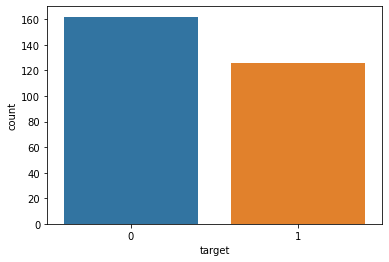

In [12]:
sns.countplot(x='target', data=df)
plt.show()

### 2.2 Data Balancing

In [13]:
while df['target'].value_counts()[0]!=df['target'].value_counts()[1]:
    df = df.append(df[df['target']==1].sample())

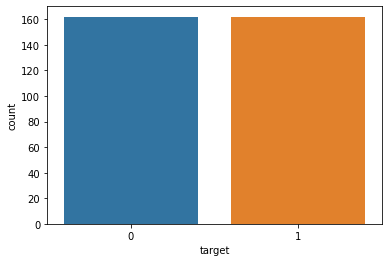

In [14]:
sns.countplot(x='target', data=df)
plt.show()

### 2.3 Data Splitting

In [15]:
df = df.drop(['Unnamed: 0'], axis=1)
y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

### 2.4 Feature Scaling

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Training

In [17]:
# 3.1. logistic regression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [18]:
# 3.2. k-nearest neighbors and find best k value
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

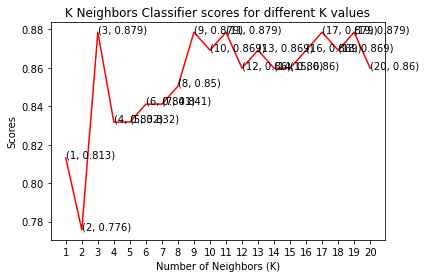

In [19]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1],3)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [20]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[2]*100, 3))

The score for K Neighbors Classifier is 87.85046728971963% with 3 nieghbors.


Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

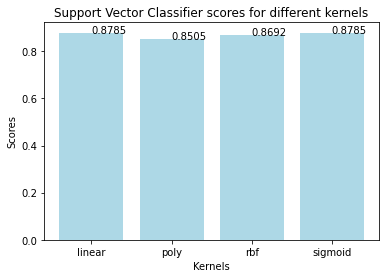

In [21]:
# 3.3. support vector machine and find best kernel
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

plt.bar(kernels, svc_scores, color = 'lightblue')
for i in range(len(kernels)):
    svc_scores[i]=round(svc_scores[i],4)
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [22]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 87.85% with linear kernel.


Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

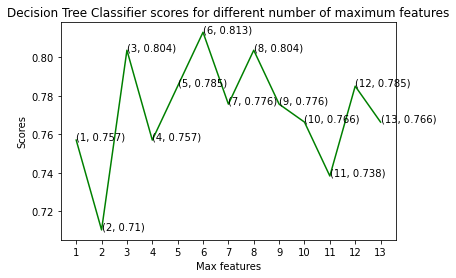

In [23]:
# 3.4. decision tree and find best criterion
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 4)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))
    
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, round(dt_scores[i-1],3)))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [24]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[4]*100, [5]))

The score for Decision Tree Classifier is 78.50467289719626% with [5] maximum features.


Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

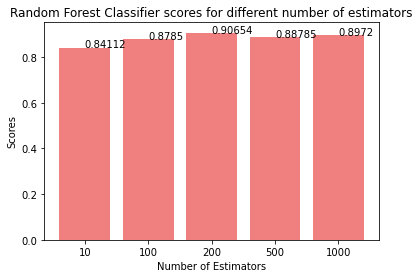

In [25]:
# 3.5. random forest with best criterion
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 2)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

plt.bar([i for i in range(len(estimators))], rf_scores, color = 'lightcoral', width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], round(rf_scores[i],5))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of Estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators') 

In [26]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[3]*100, [100]))

The score for Random Forest Classifier is 88.78504672897196% with [100] estimators.


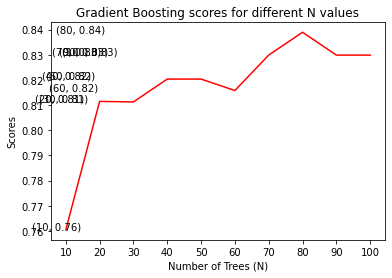

In [27]:
gb_scores = []
for n in range(10, 110, 10):
    gb_classifier = GradientBoostingClassifier(n_estimators = n)
    score = cross_val_score(gb_classifier, X_train, y_train, cv=10)
    gb_scores.append(score.mean())

plt.plot([n for n in range(10, 110, 10)], gb_scores, color = 'red')
for i in range(10):
    plt.text(i, gb_scores[i], ((i+1)*10, round(gb_scores[i],2)))
plt.xticks([n for n in range(10, 110, 10)])
plt.xlabel('Number of Trees (N)')
plt.ylabel('Scores')
plt.title('Gradient Boosting scores for different N values')
plt.show()

In [28]:
print("The score for Gradient Boosting is {}% with {} estimators.".format(gb_scores[4]*100, [50]))

The score for Gradient Boosting is 82.03463203463203% with [50] estimators.


## Model Evaluation

In [29]:
# 4.1. logistic regression

y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("========Logistic Regression========")
print(cm)
print(classification_report(y_test, y_pred))

========Logistic Regression========
[[47  3]
 [10 47]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        50
           1       0.94      0.82      0.88        57

    accuracy                           0.88       107
   macro avg       0.88      0.88      0.88       107
weighted avg       0.89      0.88      0.88       107



In [30]:
# 4.2. k-nearest neighbors
knn_classifier = KNeighborsClassifier(metric='manhattan', n_neighbors= 5, weights= 'distance')
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("========K-Nearest Neighbors========")
print(cm)
print(classification_report(y_test, y_pred))

========K-Nearest Neighbors========
[[46  4]
 [11 46]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        50
           1       0.92      0.81      0.86        57

    accuracy                           0.86       107
   macro avg       0.86      0.86      0.86       107
weighted avg       0.87      0.86      0.86       107



In [31]:
# 4.3. support vector machine
svc_classifier = SVC(kernel = 'rbf',probability=True)
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("========Support Vector Machine========")
print(cm)
print(classification_report(y_test, y_pred))

========Support Vector Machine========
[[49  1]
 [13 44]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87        50
           1       0.98      0.77      0.86        57

    accuracy                           0.87       107
   macro avg       0.88      0.88      0.87       107
weighted avg       0.89      0.87      0.87       107



In [32]:
dt_classifier = DecisionTreeClassifier(max_features=5,criterion = 'entropy')
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("========Decision Tree========")
print(cm)
print(classification_report(y_test, y_pred))

========Decision Tree========
[[40 10]
 [12 45]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        50
           1       0.82      0.79      0.80        57

    accuracy                           0.79       107
   macro avg       0.79      0.79      0.79       107
weighted avg       0.80      0.79      0.79       107



In [33]:
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy')
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("========Random Forest========")
print(cm)
print(classification_report(y_test, y_pred))

========Random Forest========
[[48  2]
 [ 9 48]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        50
           1       0.96      0.84      0.90        57

    accuracy                           0.90       107
   macro avg       0.90      0.90      0.90       107
weighted avg       0.90      0.90      0.90       107



In [34]:
gb_classifier = GradientBoostingClassifier(n_estimators = 30)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("========Gradient Boosting========")
print(cm)
print(classification_report(y_test, y_pred))

========Gradient Boosting========
[[47  3]
 [10 47]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        50
           1       0.94      0.82      0.88        57

    accuracy                           0.88       107
   macro avg       0.88      0.88      0.88       107
weighted avg       0.89      0.88      0.88       107



In [35]:
from sklearn.metrics import roc_curve, auc

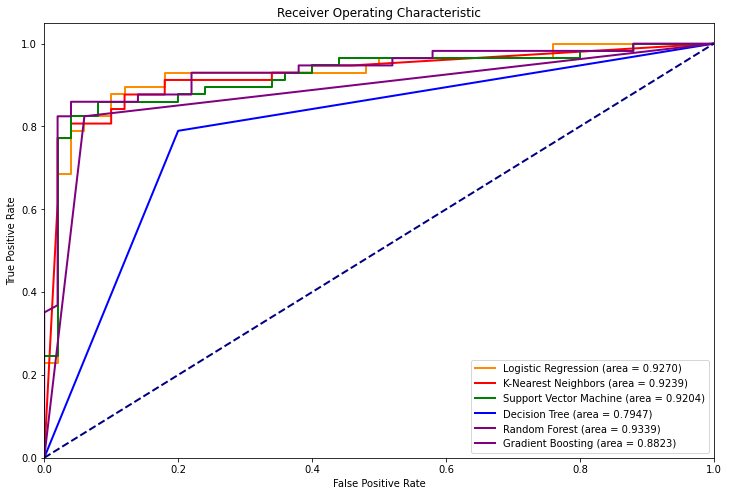

In [36]:
plt.figure(figsize=(12, 8))

y_score = log_reg.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (area = %0.4f)' % roc_auc)

y_score = knn_classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', lw=2, label='K-Nearest Neighbors (area = %0.4f)' % roc_auc)

y_score = svc_classifier.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', lw=2, label='Support Vector Machine (area = %0.4f)' % roc_auc)

y_score = dt_classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='Decision Tree (area = %0.4f)' % roc_auc)

y_score = rf_classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='purple', lw=2, label='Random Forest (area = %0.4f)' % roc_auc)

y_score = gb_classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='purple', lw=2, label='Gradient Boosting (area = %0.4f)' % roc_auc)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### K-Fold Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
classfiers = [log_reg, knn_classifier, svc_classifier, dt_classifier, rf_classifier, gb_classifier]
for m in classfiers:
    accuracies = cross_val_score(estimator=m, X=X_train, y=y_train, cv=10)
    print(m)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print()

LogisticRegression(random_state=0)
Accuracy: 82.99 %
Standard Deviation: 7.29 %

KNeighborsClassifier(metric='manhattan', weights='distance')
Accuracy: 85.80 %
Standard Deviation: 5.43 %

SVC(probability=True)
Accuracy: 81.13 %
Standard Deviation: 6.67 %

DecisionTreeClassifier(criterion='entropy', max_features=5)
Accuracy: 79.26 %
Standard Deviation: 8.77 %

RandomForestClassifier(criterion='entropy', n_estimators=1000)
Accuracy: 84.87 %
Standard Deviation: 6.68 %

GradientBoostingClassifier(n_estimators=30)
Accuracy: 81.13 %
Standard Deviation: 6.64 %



### Model Turning by GridSearchCV

In [34]:
parameters = [{'n_neighbors': [i for i in range(1, 11)], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}]
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 86.28 %
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [35]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']}]
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 84.33 %
Best Parameters: {'C': 10, 'kernel': 'rbf'}


In [36]:
parameters = [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}]
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.56 %
Best Parameters: {'criterion': 'gini', 'splitter': 'random'}


In [37]:
parameters = [{'n_estimators': [10, 100, 200, 500, 1000], 'criterion': ['gini', 'entropy']}]
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 86.23 %
Best Parameters: {'criterion': 'gini', 'n_estimators': 500}


In [38]:
parameters = [{'n_estimators': [10, 20, 30, 40, 50], 'criterion': ['friedman_mse']}]
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 82.53 %
Best Parameters: {'criterion': 'friedman_mse', 'n_estimators': 30}


## Weight the results of Models

[[48  2]
 [ 9 48]]
Accuracy: 89.72 %
Precision: 96.00 %
Recall: 84.21 %
F1 Score: 89.72 %
ROC AUC: 90.11 %


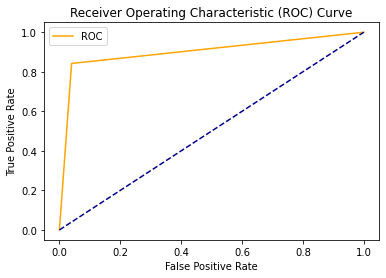

In [73]:
# Weight the results of several models
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn_classifier), ('svc', svc_classifier), ('dt', dt_classifier), ('rf', rf_classifier), ('gb', gb_classifier)],voting='soft')
voting_classifier.fit(X_train, y_train)

# predict the test set results
y_pred = voting_classifier.predict(X_test)

# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

# precision
from sklearn.metrics import precision_score
print("Precision: {:.2f} %".format(precision_score(y_test, y_pred)*100))

# recall
from sklearn.metrics import recall_score
print("Recall: {:.2f} %".format(recall_score(y_test, y_pred)*100))

# f1 score
from sklearn.metrics import f1_score
print("F1 Score: {:.2f} %".format(f1_score(y_test, y_pred)*100))

# ROC AUC
from sklearn.metrics import roc_auc_score
print("ROC AUC: {:.2f} %".format(roc_auc_score(y_test, y_pred)*100))

# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [74]:
accuracies = cross_val_score(estimator=voting_classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.83 %
Standard Deviation: 5.40 %


In [81]:
input2 = [41,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0.0,3]
input2 = np.array(input2).reshape(1,-1)
result2 = voting_classifier.predict(input2)
result2

array([0])

## Model Saving

In [76]:
import pickle
pickle.dump(voting_classifier, open('model.obj', 'wb'))
pickle.dump(rf_classifier,open('rf.obj','wb'))
pickle.dump(log_reg,open('lr.obj','wb'))
pickle.dump(knn_classifier, open('knn.obj', 'wb'))
pickle.dump(svc_classifier, open('svc.obj', 'wb'))
pickle.dump(dt_classifier, open('dt.obj', 'wb'))
pickle.dump(gb_classifier, open('gb.obj', 'wb'))

In [43]:
pickle.dump(sc,open('sc.obj','wb'))